# Remote Sensing in the Gulf of Guinea: Lesson 2

## _Reading multiple satellite images and making an animation/movie._

## Objective(s).

The student will learn how to display multiple images from a satellite, and save these images to file. The final objective is to make an animation that provides **qualitative understanding** of salinity dynamics in the Gulf of Guinea.

<div class="alert alert-block alert-info">
<b>To obtain credit for this lesson:</b> the project participant must ... There is no requirement for credit for this lesson. It is simply to illustrate that you can read multiple satellite images and to equip the reader with methods to do this.
</div>

## Description.

This lesson teaches us how to read in several netcdf (.nc) files containing satellite data and display these data as an animation or movie.

Again, all files have been downloaded from Remote Sensing Systems (http://www.remss.com/) and contain sea surface salinity (SSS), as well as a few other data products. As before, we look at SSS, zooming into a region on the Gulf of Guinea. We then display this information as a map -- i.e. as a function of geographic location. These images are displayed sequentially (one after the other), writing each image to file as a portable network graphics (.png) file. We then use free software downloaded from the Internet to make these images into a movie. (For example, for PC/Windows try http://gromada.com/imagen/ first and http://gromada.com/videomach/, for Mac try http://jeffreyearly.com/programming/image2movie/).

**Challenge questions:**
1.  How often does the salinity change at a given location in the Gulf of Guinea? Does it change every day? week? Month? Year?
1.  Where does the salt content tend to change the most? Can you explain this? Can you link this to one or more physical processes?
1.  If we were interested in salinity in another region of the world (say Brazil), how would we modify our code to display these regions?

You may not be able to answer these questions completely, but it is good to think about these questions as you go through the lesson.

**Christian Buckingham & Eben Nyadjro**

<div class="alert alert-block alert-success">
<b>Quote:</b> If a picture is worth a thousand words, a movie is worth a million.
</div> There is quite a bit of information in an animation that can be difficult to quantify but which helps us understand the dynamics in a qualitatively useful manner. This is invaluable.

## Load a few important packages.

First, we load a few important packages. If you do not have these, and if you are using anaconda as your python distribution, type **`conda install xarray`** at the terminal window (MacOS, Linux) or command line (Windows). The conda manager package should download it from the internet. If you have installed python a different way, try **`pip install xarray`**.

In [2]:
## A few necessary packages.
import numpy as np
from netCDF4 import Dataset #Dataset, MFDataset
import xarray as xr
import matplotlib.pyplot as plt
import scipy.signal as signal
import os.path
import datetime as dt
import calendar as calendar

## Read in several netcdf files.

As we learned in __[Lesson 1](RemoteSensing_Lesson1.ipynb)__, NetCDF (.nc) files contain binary data in a format that contains not only the data themselves but also information that describes these data. We referred to this latter type of information as **metadata**.

Below, we use strings to tell Python where to find the file and we plot the data itself. Since we are already familiar with the file type, we will not worry about the metadata; that is, we will not display it to the screen.

One of the more difficult challenges here is defining the filenames for the files. Since there are (potentially) so many, we will not want to type these in one-by-one. Rather, we will want to automate this step ... As is the case with most satellite data, it just so happens that the filenames have a unique format. That is, they (a) are always the same length and (b) only change with the date of the file. Thus, we can define (create) the text string describing the filename by looping over specific dates. Note that the dates are in a strange format: [year]_[day of year]. For example, if yyyy = "2020" and ddd = "001", this would be 1 January 2020. Similarly, if yyyy = "2020" and ddd = "366", this would be 31 December 2020. (The year 2020 is a leap year.) Have a look at https://www.esrl.noaa.gov/gmd/grad/neubrew/Calendar.jsp?view=DOY&year=2020&col=4 to convert to user-friendly dates.

In [4]:
# Define the files to be read.

# Here is an example file just to make sure we are getting it correct.
# Define the filename.
# pname = "../../data/salinity/" # remember the slash on the end of the pathname
# fname = "RSS_smap_SSS_L3_8day_running_2020_199_FNL_v04.0.nc"
# infile = pname+fname

# Define the base input directory.
basedirin = "../../data/salinity/" #  # main directory, remember the slash on the end of the pathname

# Define the prefix, suffix, resolution and extension.
# The total filename will be ... fname = prefx + resolution + yyyy_ddd + suffx + ext
prefx = "RSS_smap_SSS_L3_8day_running_"
suffx = "_FNL_v04.0"
ext = ".nc"

years_of_interest = np.array([2020])
nyear_of_interest = len(years_of_interest)

days_of_interest = np.arange(366) # add an extra day to handle leap years
nday_of_interest = len(days_of_interest) # this will be 366

ifile = 0 # initialise this value
infiles = {}
infiles_time_yr = {}
infiles_time_dy = {}
for icounter in range(nyear_of_interest): # loop over years
    for jcounter in range(366): # loop over days
        
        yr = years_of_interest[icounter] # year
        dy = days_of_interest[jcounter] # day
        
        yyyy = str(yr) # string denoting year
        ddd = str(dy) # string denoting day
        
        # This part is a bit tricky because we need the numbers to look like
        # "001","002" ... "090" rather than "1","2" ... "90"
        # So we check to see what the value is, and add zeros in front.
        if (dy < 10.0):
            ddd = "00"+ddd
        elif (dy >= 10) & (dy < 100):
            ddd = "0"+ddd
        else:
            ddd = ddd
        
        yyyy_ddd = yyyy + "_" + ddd
        
        #=======================================================================================
        # Sometimes the folders have a subdirectory in the form of a "year".
        subdir = yyyy + "/" # subdirectory, remember the slash on the end of the pathname
        pname = basedirin + subdir
        
        ## Sometimes the files are not in a subdirectory.
        subdir = "" # subdirectory, remember the slash on the end of the pathname
        pname = basedirin
        #=======================================================================================
        fname = prefx + yyyy_ddd + suffx + ext
        
        infile = pname+fname
        
        # The following is a check to see if the file exists.
        # If it does, we store it in an array or "dictionary".
        print("Checking to see if file exists ... ")
        tmp = os.path.exists(infile)
        if tmp:
            
            # Print this to the screen for the user.
            # Store input filename in another variable.
            print(infile)
            infiles[ifile] = infile # store in a dictionary, if we want to access we type infiles[ifile]
            infiles_time_yr[ifile] = yr # store in a dictionary
            infiles_time_dy[ifile] = dy # store in a dictionary
            ifile = ifile + 1 # increment this variable
        

Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exists ... 
Checking to see if file exis

In [5]:
# We can check the contents of the dictionary by
# looping over the filenames we stored.
for ii in range(len(infiles)): # loop over infiles
        
        infile_tmp = infiles[ii] # present filename
        print(infile_tmp)

../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_190_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_191_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_192_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_193_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_194_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_195_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_196_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_197_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_198_FNL_v04.0.nc
../../data/salinity/RSS_smap_SSS_L3_8day_running_2020_199_FNL_v04.0.nc


### Create a function.

In code, if you do something more than once, it is a good idea to make that code a function.

To do this, we place the code in a text file with the extension `.py` and then import the module. Here, we refer to that module as `IOtools` but the file itself is called __[IOtools.py](IOtools.py)__.

In [6]:
import IOtools

# Define inputs to the function.
basedirin = "../../data/salinity/" # main directory, remember the slash on the end of the pathname
years_of_interest = np.array([2020])
ext = ".nc" # define extensions
sw_years = True # this is a switch that tells the program to look inside "year" folders

# Call the function to get the list of filenames in that directory and for those years of interest.
infiles = IOtools.get_filenames_smap(basedirin,years_of_interest,ext,sw_years) # this is the same as python's meshgrid so one could use that instead


../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_190_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_191_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_192_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_193_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_194_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_195_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_196_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_197_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_198_FNL_v04.0.nc
../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_199_FNL_v04.0.nc


### Loop over the files and read them.

Now, we read in the netcdf files. In this case, we loop over each file, display it to the screen, and save each image to file as we do so. As before, this uses a function called **`Dataset`** in the **`netCDF4`** package.

#### Handling time.

It would also be useful to handle time a little differently. We do this below, using the **`datetime`** package. As an example, we can read in the variable "time" from the netcdf variables, which are given to us in units of "seconds since 2000/01/01 00:00:000":

In [7]:
# The following example converts "seconds since 2000/01/01 00:00:00" to 
# a user-friendly string, like "31-Dec-2019 (00:00:00)".
reftime = dt.datetime(2000,1,1,0,0,0) # define reference time using "datetime" package
etime = np.array([ 631065600 ]) # seconds since reference time, in this case 2000/01/01 00:00:00
dtime = etime / 86400 # this is the number of days since 2000/01/01 00:00:00
time_info = np.array([ reftime + dt.timedelta(days=dtime[ii]) for ii in range(len(dtime)) ])
time_str = dt.datetime.strftime(time_info[0],"%d-%b-%Y (%H:%M:%S)")
print(time_str)

31-Dec-2019 (00:00:00)


You can try the above code by modifying the variable `etime` (i.e. the number of seconds since the reference time `reftime`). For example, changing the number of seconds since 2000/01/01 00:00:000 to 1 should give 01-Jan-2000 (00:00:01).

#### Saving your plot to file.

Saving your plots to file is very simple in Python. One simply types `plt.savefig(outfile,format='png',dpi=200)` after the plot is created and the file is saved to the filename `outfile`. Here, `outfile` is a string telling Python where to place the resulting image, `png` is the image format and stands for Portable Network Graphics, and `200` is the resolution of the image in dots-per-inch.

It is also helpful to place the plot files in a separate directory. To do this, we create a directory (outside of Python / Jupyter notebooks) and specify that location just as we did the input files.

Here's an example:

```

# Define the base output directory.
basedirout = "../../graphics/salinity/" # main directory, remember the slash on the end of the pathname

# Print image to file.
outdir = basedirout
yyyy_ddd = "2020_200"
outfile = outdir+'smap_'+ yyyy_ddd + '.png'
print("Writing file ... " + outfile)
plt.savefig(outfile,format='png',dpi=200)

```

#### Main code.

Putting all of this information together (loading the module, calling the function, converting to dates, as well as the subsetting by region learned in Lesson 1), we obtain the following code:

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_190_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_190.png


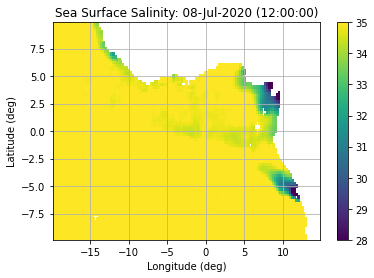

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_191_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_191.png


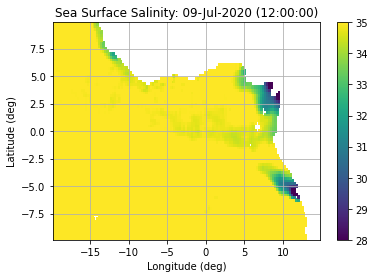

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_192_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_192.png


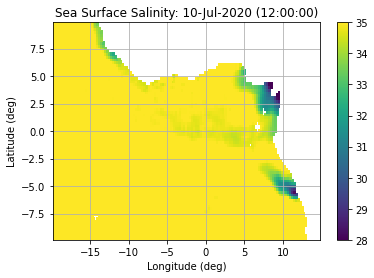

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_193_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_193.png


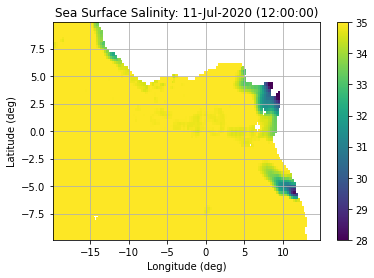

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_194_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_194.png


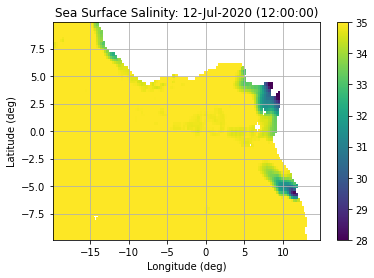

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_195_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_195.png


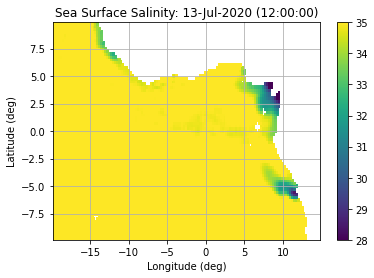

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_196_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_196.png


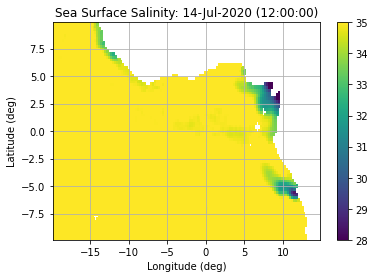

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_197_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_197.png


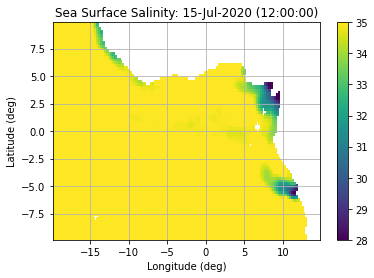

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_198_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_198.png


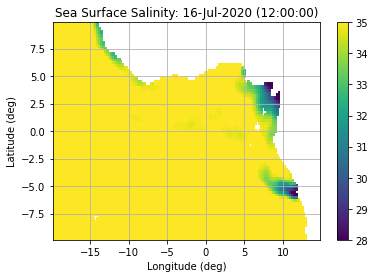

Reading file ... ../../data/salinity/2020/RSS_smap_SSS_L3_8day_running_2020_199_FNL_v04.0.nc
Writing file ... ../../graphics/salinity/smap_2020_199.png


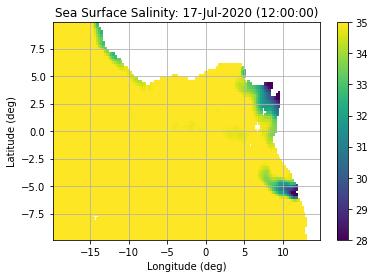

In [10]:
# Determine the number of files.
nfile = len(infiles)

# Define the base output directory.
basedirout = "../../graphics/salinity/" # main directory, remember the slash on the end of the pathname

# Now loop over each file and display.
for counter in range(nfile):
    
    #======================================================
    # Read file.
    
    infile = infiles[counter]
    yr = infiles_time_yr[counter]
    dy = infiles_time_dy[counter]
    print("Reading file ... " + infile)
    
    #======================================================
    # Read in the data from the netcdf file.
    # We use the netCDF4 package to read the netcdf file.
    
    nc = Dataset(infile, "r")
    etime = nc.variables["time"][:] # time in seconds since 2000/01/00 00:00
    lat = nc.variables["lat"][:] # latitude (degrees), values = [-90, 90]
    lon = nc.variables["lon"][:] # longitude (degrees), values = [0, 360]
    nobs = nc.variables["nobs"][:] # Number of observations for L3 average (unitless)
    sss_smap = nc.variables["sss_smap"][:] # sea_surface_salinity (practical salinity units == unitless)
    sst_ref = nc.variables["surtep"][:] # Ancillary sea surface temperature (from Canada Meteorological Center), doi: 10.5067/GHCMC-4FM03
    
    # Access the "data" portion of the variable, as python handles this as a masked array.
    etime = etime.data
    lat = lat.data
    lon = lon.data
    sss = sss_smap.data
    
    # Convert some variables to double precision (float64).
    lat = np.double(lat)
    lon = np.double(lon)
    sss = np.double(sss)
    
    nlat = len(lat)
    nlon = len(lon)
    sdata = sss.shape
    
    # Simple manner of handling time.
    dtime = etime/86400 # convert seconds since reference to days since reference ...
    
    #======================================================
    # Subset for the region of interest.
    
    latlim = np.array([-10.0,10.0])
    lonlim = np.array([-20.0,15.0])
    latlim = np.double(latlim)
    lonlim = np.double(lonlim)
    ilat1 = (lat >= latlim[0]) & (lat <= latlim[1])
    ilon1 = ((lon-360.0) >= lonlim[0]) & ((lon-360.0) < 0.);
    ilon2 = (lon >= 0) & (lon <= lonlim[1])
    ilat = ilat1;
    ilon = np.concatenate((ilon1,ilon2), axis=0)
    
    lats = lat[ilat1]
    lons1 = lon[ilon1] - 360
    lons2 = lon[ilon2]
    lons = np.concatenate((lons1,lons2), axis=0)
    
    index1 = np.array(np.where(ilat))
    index2 = np.array(np.where(ilon))
    #print(index1)
    #print(index2)
    sss_block1 = sss[ilat,:]
    sss_block1 = sss_block1[:,ilon1]
    sss_block2 = sss[ilat,:]
    sss_block2 = sss_block2[:,ilon2]
    
    nlats = len(lats)
    nlons = len(lons)
    nlons1 = len(lons1)
    nlons2 = len(lons2)
    sss_block = np.zeros([nlats,nlons])
    sss_block[0:nlats,0:nlons1] = sss_block1
    sss_block[0:nlats,nlons1:nlons1+nlons2] = sss_block2
    
    #======================================================
    # Form a mask for the land.
    # This mask uses the bad salinity values to identify land.
    mask = np.zeros([nlats,nlons])
    igood = (sss_block >= 10) # find good salinity values
    mask[igood] = 1
    inan = (sss_block < 10) # find bad values
    mask[inan] = np.nan # not a number
    
    #======================================================
    # Plot the salinity.
    yyyy = str(yr)
    ddd = str(dy)
    time_str = yyyy + "_" + ddd
    
    # Handle the time information.
    reftime = dt.datetime(2000,1,1,0,0,0) # define reference time using "datetime" package    
    time_info = np.array([ reftime + dt.timedelta(days=dtime[ii]) for ii in range(len(dtime)) ])
    time_str = dt.datetime.strftime(time_info[0],"%d-%b-%Y (%H:%M:%S)")
    #time_str = dt.datetime.strftime(time_info[0],"%d-%b-%Y (%H:%M:%S.%f)")
    
    plt.pcolor(lons,lats,sss_block*mask)
    plt.clim(28,35)
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Latitude (deg)')
    plt.title('Sea Surface Salinity: '+ time_str)# here we need to insert a date inside the brackets
    plt.grid()
    plt.colorbar()
    
    # Note that we had to get rid of the plt.show() command.
    # Please ask Dr. Paige why this is.
    
    #======================================================
    # Create text for the output filename.
    
    yyyy = str(yr)
    ddd = str(dy)
    if (dy < 10.0):
        ddd = "00"+ddd
    elif (dy >= 10) & (dy < 100):
        ddd = "0"+ddd
    else:
        ddd = ddd
    
    yyyy_ddd = yyyy + "_" + ddd
    
    # Print image to file.
    outdir = basedirout
    outfile = outdir+'smap_'+ yyyy_ddd + '.png'
    #outfile = outdir+'smap_'+ yyyy_ddd + str(counter)+'.png'
    print("Writing file ... " + outfile)
    plt.savefig(outfile,format='png',dpi=200)
    
    plt.pause(1) # time.sleep(0.5)

As __[before](Salinity_GulfOfGuinea_Lesson1.ipynb)__, **there seems to be a lot of low-salinity water (fresh water) emanating from the coastline and which is likely due to the Congo and Niger rivers.**

The next thing we need to do is take all of these images and make a movie. For the MacOS, I use a program called **_Image2Movie_** written by Jeff Early (http://jeffreyearly.com/programming/image2movie/). For the PC, you can try a program called **_VideoMach_** (http://gromada.com/videomach/) or, for a quick result, you can try **_imagen_** (http://gromada.com/imagen/). Linux operating systems such as Ubuntu can do this using **_ffmpeg_**. (**Note: in all of these cases, for the present project to work, the software must be able to handle .png images.**)

After making the movie with 5 or 10 images, together as a team, we will make a movie with **all of the images**. That's 5 years of data so we should be able to see some neat features!

**In the __[final lesson](Salinity_GulfOfGuinea_Lesson3.ipynb)__, we will examine the satellite data at a single location to see if there is a seasonal signal in SSS.** The region that will be selected is just outside the Congo River (i.e. latitude = -6 deg, longitude = +7 deg), although the user may change this location as desired. We may not have time to do this but it is a good lesson. We can talk about it as the year progresses if you would like.